In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#a function for Euler's method

def euler_int(x0, xmax, step, y0, dydx):
    """
    Uses Euler's method to numerically integrate a differential equation
    Inputs:
        step: the step to go forward in the x
        x0: the initial x-value
        xmax: the maximum x-value
        y0: the initial y-value
        dydx: the differential equation
    """
    y = y0
    x_values = [x0 + step*n for n in range(0, int((xmax-x0)/step)+1)]
    y_values=[]
    for x in x_values:
        y_values.append(y)
        y += dydx(y,x)*step
    return x_values, y_values

In [119]:
#Solving the exponential
def dxdt_exp(x,t):
    k=2
    return k*x
xdata, ydata = euler_int(
    0,
    10,
    1,
    1,
    dxdt_exp
)
print(ydata)

[1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683, 59049]


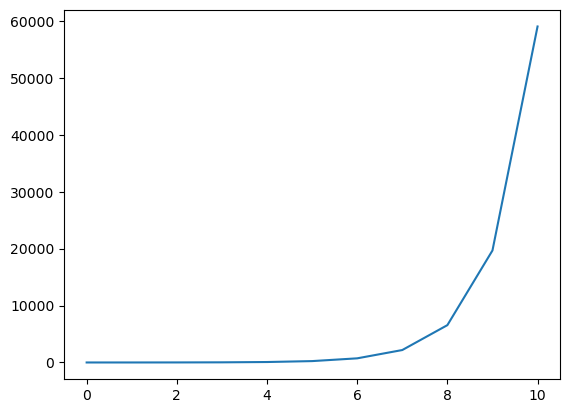

In [120]:
plt.plot(xdata, ydata, "-")
plt.show()

In [94]:
#Solving the logistic
def dxdt_log(x,t):
    L=20
    k=1/2
    return k*x*(1-x/L)
xdata, ydata = euler_int_vector(
    0,
    10,
    0.1,
    1,
    dxdt_log
)

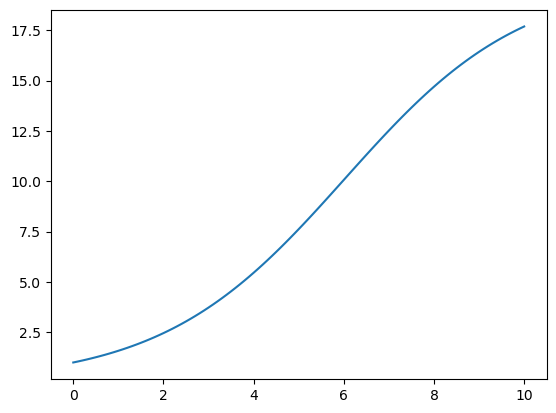

In [87]:
plt.plot(xdata, ydata, "-")
plt.show()

<h1>Coupled first-order ODEs</h1>
$$
\begin{align}
\frac{dy_1}{dx} &= y_1 + y_2^2 + 3x \\
\frac{dy_2}{dx} &= y_1 + y_2^3 - cos(x)
\end{align}
$$

Solve by arranging into a vector:
$$
\frac{dS}{dx} = 
\begin{pmatrix} 
    \frac{dy_1}{dx} \\ 
    \frac{dy_2}{dx} 
\end{pmatrix}
=
\begin{pmatrix}
    y_1 + y_2^2 + 3x \\
    y_1 + y_2^3 - cos(x)
\end{pmatrix}
$$

In [109]:
def euler_int_vector(x0, xmax, step, y0, dydx):
    """
    Uses Euler's method to numerically integrate a differential equation
    Inputs:
        step: the step to go forward in the x
        x0: the initial x-value
        xmax: the maximum x-value
        y0: the initial y-value
        dydx: the differential equation
    """
    y = y0
    x_values = [x0 + step*n for n in range(0, int((xmax-x0)/step)+1)]
    y_values=[]
    for x in x_values:
        y_values.append(y)
        delt_y = np.multiply(dydx(y,x), step)
        y = np.add(y, delt_y)
    return x_values, y_values

In [121]:
#testing the vector function 
def dxdt_exp_log(x,t):
    x1, x2 = x
    k=1/2
    L=20
    return [
        k*x1,
        k*x2*(1-x2/L)
    ]
xdata, ydata = euler_int_vector(
    x0= 0,
    xmax= 10,
    step= 1,
    y0= [1,1],
    dydx= dxdt_exp_log
)
y1= [y[0] for y in ydata]
y2= [y[1] for y in ydata]
print(y1)

[1, 1.5, 2.25, 3.375, 5.0625, 7.59375, 11.390625, 17.0859375, 25.62890625, 38.443359375, 57.6650390625]


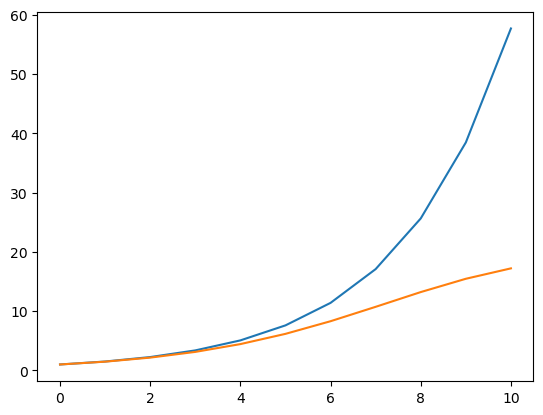

In [122]:
plt.plot(xdata, y1, "-", label= "$\frac{dx}{dt} = kx$")
plt.plot(xdata, y2, "-", label="$\frac{dx}{dt} = kx(1-\frac{x}{L}$")
plt.show()

In [128]:
#Solving the coupled first-order ODEs
def dSdt_coupled(S,x):
    y1,y2 = S
    return [
        y1 + y2**2 + 3*x,
        y1 + y2**3 - np.cos(x)
    ]
xdata, ydata = euler_int_vector(
    0,
    1,
    0.01,
    [0,0],
    dSdt_coupled
)
y1= [y[0] for y in ydata]
y2= [y[1] for y in ydata]

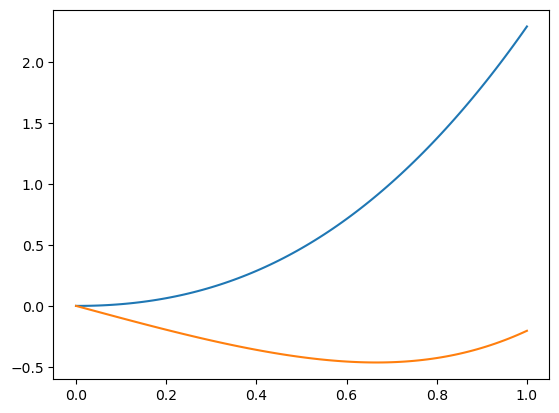

In [127]:
plt.plot(xdata, y1, "-")
plt.plot(xdata, y2, "-")
plt.show()

<h1>Laplace Equation</h1>
$$
\frac{d^2y}{dx^2} = 0
$$
Rearrange as a system of first-order ODEs:
$$
\begin{align}
\frac{dy}{dx} &= A \\
\frac{dA}{dx} &= 0
\end{align}
$$

Solve by arranging into a vector:
$$
\frac{dS}{dx} = 
\begin{pmatrix} 
    \frac{dy}{dx} \\ 
    \frac{dA}{dx} 
\end{pmatrix}
=
\begin{pmatrix}
    A \\
    0
\end{pmatrix}
$$

In [142]:
#Solving the laplace equation
def dSdt_coupled(S,x):
    y,A = S
    return [
        A,
        0
    ]
xdata, ydata = euler_int_vector(
    0,
    1,
    0.01,
    [5,3],
    dSdt_coupled
)
y= [y[0] for y in ydata]
A= [y[1] for y in ydata]

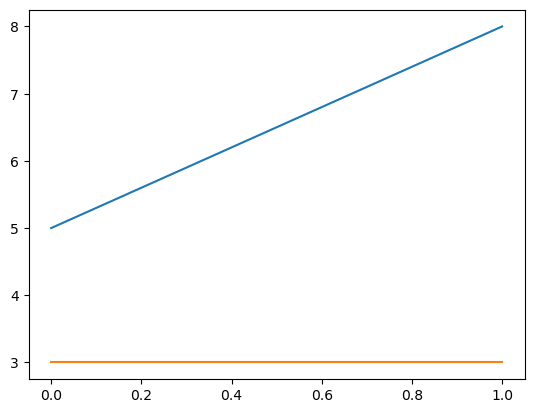

In [143]:
plt.plot(xdata, y, "-")
plt.plot(xdata, A, "-")
plt.show()

In [25]:
xvalues = [x for x in range(0,10,1)]
print(xvalues)

lap={xvalues[n]:(xvalues[(n+1)]+xvalues[(n-1)])/2 + xvalues[n] 
     for n in range(0, len(xvalues)) 
     if n-1 >= 0 and n+1 < len(xvalues)}
print(lap)
print(lap.values())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
{1: 2.0, 2: 4.0, 3: 6.0, 4: 8.0, 5: 10.0, 6: 12.0, 7: 14.0, 8: 16.0}
dict_values([2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])


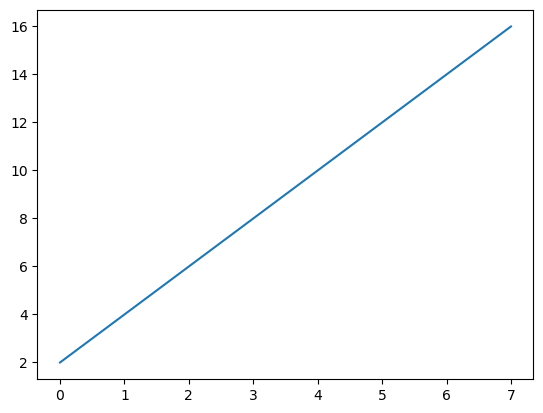

In [26]:
plt.plot(lap.values())
plt.show()